# Generation of statistics for heatwave indices

Author: Hugo Carrillo

Creation: July 2024

Steps:
1. We read the indices HWN, HWF, HWD, HWM, HWA for each year and stations, produced by the previous notebook.
2. We produce the plots for the mean of Central Chile.
3. We produce the Mann-Whitney U-test.

In [1]:
import sys
import os

import pickle

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) # Suppress specific RuntimeWarnings

In [2]:
%load_ext autoreload
%autoreload 2

# Parameters


In [3]:
METADATA_PATH_AND_FILENAME = 'data/metadata.parquet'
CLEANED_DATA_PATH = 'data/cleaned/' 
MY_FUNCTIONS_PATH = '../functions/'
AUX_DATA_FOLDER = 'data/aux/'
PLOTS_FOLDER = 'plots/'

In [4]:
# Add the folder to the Python path
folder_path = os.path.abspath(MY_FUNCTIONS_PATH)
sys.path.insert(0, folder_path)

from HWCompAndStats import (
    HW_stats_of_indices,
    plot_stats_of_hwi,
    plot_t_and_u_test_all_indices,
)

# Reading data

In [5]:
filename = 'hw_Chile_summary.pkl' 
with open(AUX_DATA_FOLDER + filename, 'rb') as f:
    hw_Chile_summary_from_file = pickle.load(f)

hw_Chile_summary = hw_Chile_summary_from_file.copy() #this is a summary by year and by station

# New summary
Now it computes averages, std, and quartiles of each index. Hence, it includes statistical information.


In [6]:
hwi_stats_Chile = HW_stats_of_indices(hw_Chile_summary)

# 

# Plot 1: Timeseries of the average of a heatwave index over Central Chile
For this notebook (and work), we consider the definition given by MeteoChile

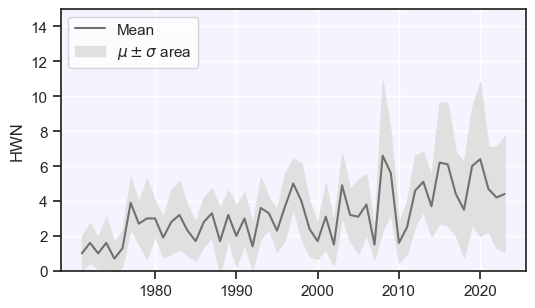

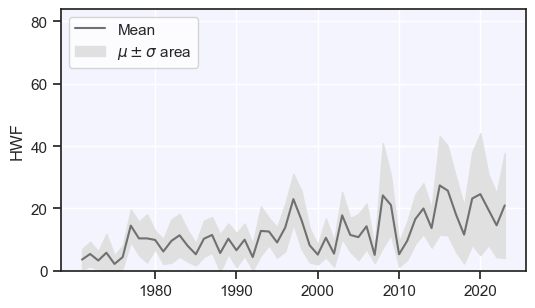

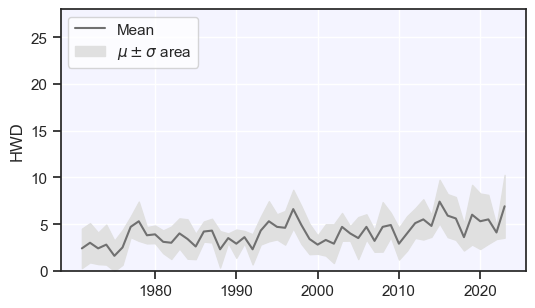

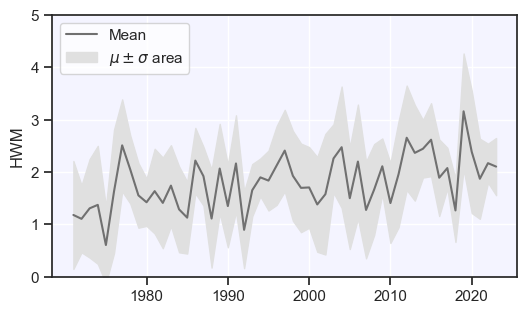

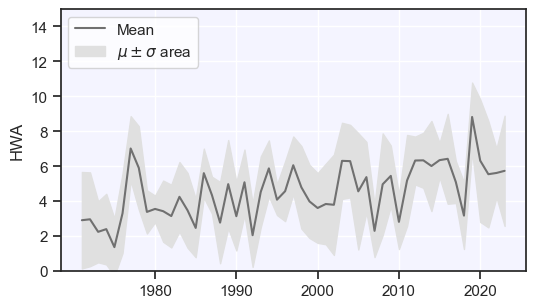

In [7]:
hwdef = 'MeteoChile'
hwis = ['HWN', 'HWF', 'HWD', 'HWM', 'HWA']
stat = 'mean'

ymax = {'HWN': 15, 'HWF': 84, 'HWD': 28, 'HWM': 5, 'HWA': 15} #defined to be consistent with California ymax

for hwi in hwis:
    plot_stats_of_hwi(hwi_stats_Chile[hwdef], hwi, 'MC', stat = stat, add_line = False,
                        saveplot = True, folder = PLOTS_FOLDER,
                        filename = hwdef + '_Chile.pdf', ymax = ymax[hwi])

# Plot 2: Mann-Whitney test of the previous timeseries

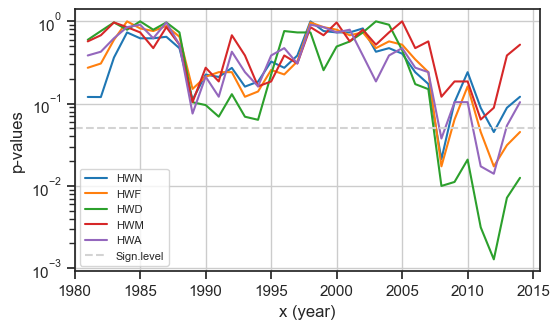

In [8]:
hwdef = 'MeteoChile'
indices = ['HWN', 'HWF', 'HWD', 'HWM', 'HWA']
yw = 'MC'
region_name = 'Central_Chile'
meas = 'mean'
plot_t_and_u_test_all_indices(hwi_stats_Chile[hwdef][yw], indices, meas=meas, yw = [1971, 2023], length = 10, t_or_u_plot = None,
                          saveplot = True, folder = PLOTS_FOLDER, region_name = region_name)
